<a href="https://colab.research.google.com/github/divyasv2000/TSF-Task-6/blob/main/Decision_Tree_classifier_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Decision Tree Algorithm**

##Author - Divya Mangalpelli


In [ ]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris = pd.read_csv("/content/iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              150 non-null    int64  
 1    SepalLengthCm  150 non-null    float64
 2    SepalWidthCm   150 non-null    float64
 3   PetalLengthCm   150 non-null    float64
 4    PetalWidthCm   150 non-null    float64
 5   Species         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**Removing unneeded columns**

In [ ]:
iris.drop("Id", axis=1, inplace = True)

**Some EDA with Iris**

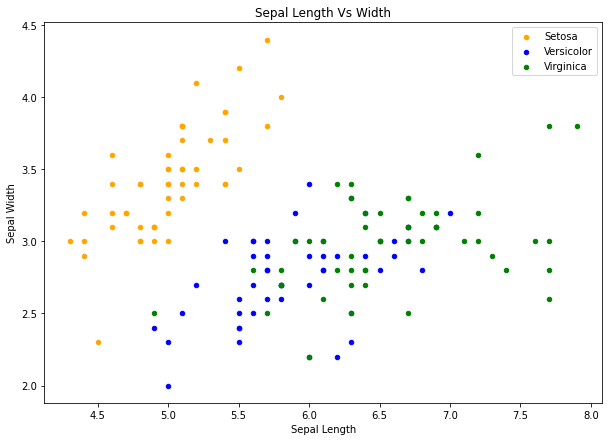

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x=' SepalLengthCm', y=' SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x=' SepalLengthCm', y=' SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x=' SepalLengthCm', y=' SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


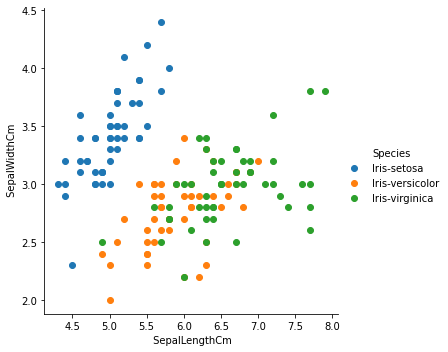

In [ ]:
sns.FacetGrid(iris, hue='Species', size=5)\
   .map(plt.scatter, ' SepalLengthCm', ' SepalWidthCm')\
   .add_legend()

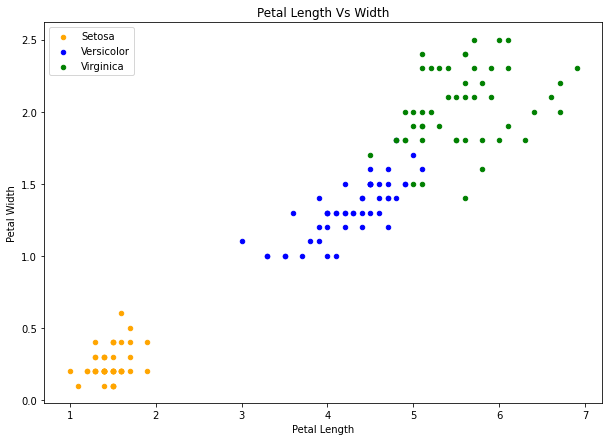

In [ ]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y=' PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y=' PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y=' PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

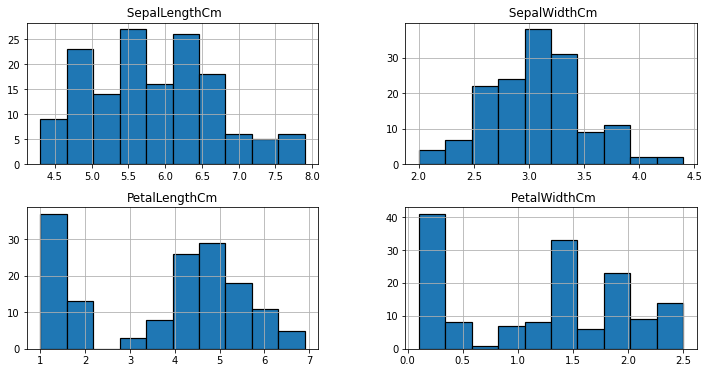

In [ ]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

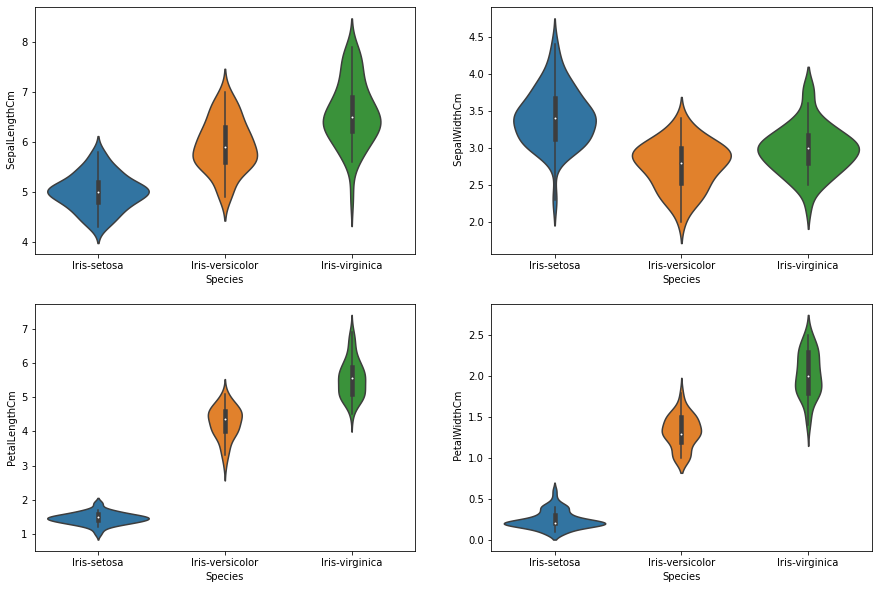

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = ' SepalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = ' SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = ' PetalWidthCm', data=iris)

In [ ]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [ ]:
iris.shape

(150, 5)

**Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.**

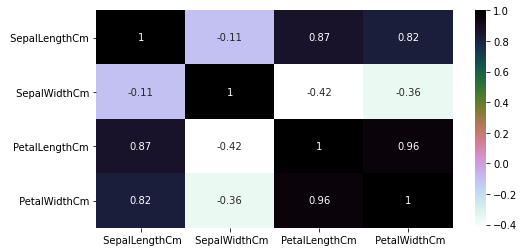

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') 
# draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

##**Splitting The Data into Training And Testing Dataset**

In [ ]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [ ]:
train_X = train[[' SepalLengthCm',' SepalWidthCm','PetalLengthCm',' PetalWidthCm']] # taking the training data features
train_y = train.Species # output of the training data

test_X = test[[' SepalLengthCm',' SepalWidthCm','PetalLengthCm',' PetalWidthCm']] # taking test data feature
test_y = test.Species # output value of the test data

In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
112,6.8,3.0,5.5,2.1
94,5.6,2.7,4.2,1.3
106,4.9,2.5,4.5,1.7
93,5.0,2.3,3.3,1.0
147,6.5,3.0,5.2,2.0


In [ ]:
train_y.head()

112     Iris-virginica
94     Iris-versicolor
106     Iris-virginica
93     Iris-versicolor
147     Iris-virginica
Name: Species, dtype: object

In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5.0,3.6,1.4,0.2
37,4.9,3.1,1.5,0.1
33,5.5,4.2,1.4,0.2
90,5.5,2.6,4.4,1.2
87,6.3,2.3,4.4,1.3


##**Decision Tree**

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9111111111111111


##We used all the features of iris in Decision Trees. Now we will use Petals and Sepals Seperately

##Creating Petals And Sepals Training Data

In [ ]:
petal = iris[['PetalLengthCm',' PetalWidthCm','Species']]
sepal = iris[[' SepalLengthCm',' SepalWidthCm','Species']]

##For Iris Petal

In [ ]:
train_p,test_p = train_test_split(petal, test_size=0.3, random_state=0) #petals
train_x_p = train_p[[' PetalWidthCm','PetalLengthCm']]
train_y_p = train_p.Species

test_x_p = test_p[[' PetalWidthCm','PetalLengthCm']]
test_y_p = test_p.Species

##For Iris Sepal

In [ ]:
train_s,test_s = train_test_split(sepal, test_size=0.3, random_state=0) #sepals
train_x_s = train_s[[' SepalWidthCm',' SepalLengthCm']]
train_y_s = train_s.Species

test_x_s = test_s[[' SepalWidthCm',' SepalLengthCm']]
test_y_s = test_s.Species

##Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',(metrics.accuracy_score(prediction,test_y_p)*100))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',(metrics.accuracy_score(prediction,test_y_s)*100))

The accuracy of the Decision Tree using Petals is: 95.55555555555556
The accuracy of the Decision Tree using Sepals is: 64.44444444444444


##Observations:

**Using Petals over Sepal for training the data gives a much better accuracy.**

**This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.**